In [1]:
# sets the path to the root of the repository
from pathlib import Path
import sys
import os

root_path = os.path.dirname(os.path.abspath(''))
sys.path.append(str(root_path))
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prediction_head.data import get_regression_dataset, get_binary_dataset, get_multiclass_dataset, get_multilabel_dataset, get_zeroinflated_dataset, get_zeroinflated_negativebinomial_dataset, get_zeroinflated_exponential_dataset, TaskType
from prediction_head.GLM import GLM, train_one_epoch, train_loop, TaskSpec
from prediction_head.plot import plot_regression_distribution, plot_classification_distribution, plot_ground_truth_vs_predictions


## Regression with Noise 0.1

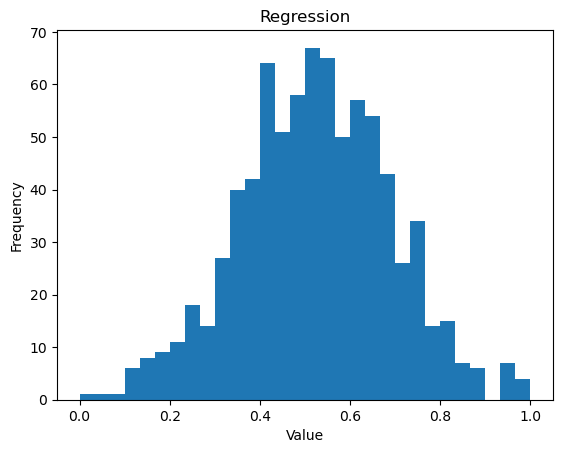

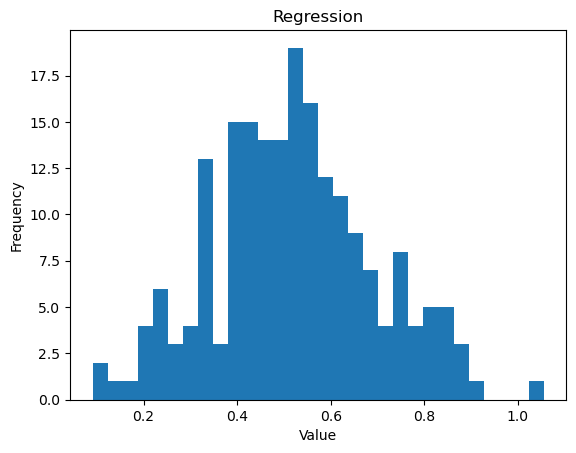

{'r2': 0.3827166874224479, 'r': 0.6358681530082815, 'rmse': 154.55489993565365, 'mae': 122.39055137325359}


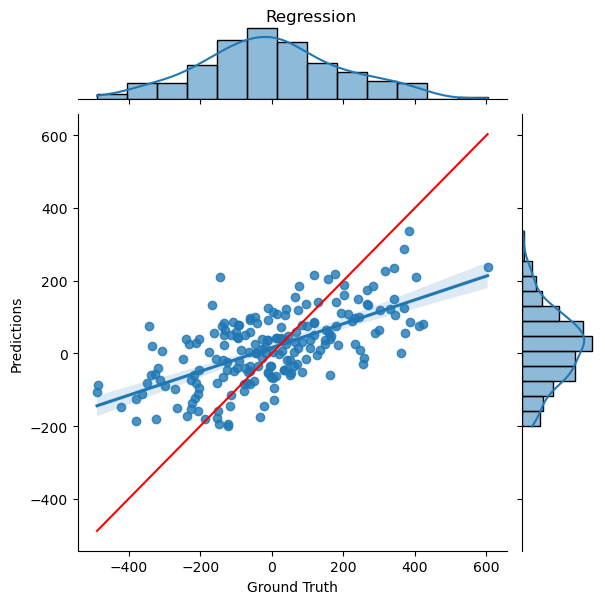

In [2]:
dataloaders: dict = {TaskType.regression: get_regression_dataset(n_features=25, noise=0.1)}
task_specs = [TaskSpec(TaskType.regression, 1, TaskType.regression)]
train_dataloader = dataloaders[TaskType.regression][0]
test_dataloader = dataloaders[TaskType.regression][1]
scaler = dataloaders[TaskType.regression][2]
# plot data (train)
plot_regression_distribution(np.array(train_dataloader.dataset.y), title="Regression", xlabel="Value", ylabel="Frequency")
# plot data (test)
plot_regression_distribution(np.array(test_dataloader.dataset.y), title="Regression", xlabel="Value", ylabel="Frequency")
# run ML model
results = train_loop(25, task_specs, dataloaders, epochs=10)
print(results["regression"][0])
# plot parity plot
plot_ground_truth_vs_predictions(results["regression"][1], results["regression"][2], title="Regression", xlabel="Ground Truth", ylabel="Predictions")
